<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Creating-a-circuit" data-toc-modified-id="Creating-a-circuit-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Creating a circuit</a></span><ul class="toc-item"><li><span><a href="#QAOA-problem-graph" data-toc-modified-id="QAOA-problem-graph-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>QAOA problem graph</a></span></li><li><span><a href="#Universal-interface" data-toc-modified-id="Universal-interface-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Universal interface</a></span><ul class="toc-item"><li><span><a href="#Cirq" data-toc-modified-id="Cirq-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Cirq</a></span></li><li><span><a href="#Qiskit" data-toc-modified-id="Qiskit-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Qiskit</a></span></li></ul></li></ul></li><li><span><a href="#Simulate-circuits" data-toc-modified-id="Simulate-circuits-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simulate circuits</a></span><ul class="toc-item"><li><span><a href="#Using-qtree" data-toc-modified-id="Using-qtree-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Using qtree</a></span></li><li><span><a href="#Using-Cirq" data-toc-modified-id="Using-Cirq-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Using Cirq</a></span></li><li><span><a href="#Simulate-multiple-amplitudes" data-toc-modified-id="Simulate-multiple-amplitudes-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Simulate multiple amplitudes</a></span></li></ul></li><li><span><a href="#Use-lightcone-optimisaiton" data-toc-modified-id="Use-lightcone-optimisaiton-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Use lightcone optimisaiton</a></span><ul class="toc-item"><li><span><a href="#Use-qiskit-circuit-as-input" data-toc-modified-id="Use-qiskit-circuit-as-input-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Use qiskit circuit as input</a></span></li></ul></li><li><span><a href="#Optimization" data-toc-modified-id="Optimization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Optimization</a></span><ul class="toc-item"><li><span><a href="#Get-line-graph" data-toc-modified-id="Get-line-graph-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Get line graph</a></span></li><li><span><a href="#Find-ordering" data-toc-modified-id="Find-ordering-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Find ordering</a></span></li></ul></li></ul></div>

# QTensor usage

## Creating a circuit


In [1]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.22.2', 'qiskit-aer': '0.11.2', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.19.2', 'qiskit': '0.39.2', 'qiskit-nature': None, 'qiskit-finance': '0.3.3', 'qiskit-optimization': '0.4.0', 'qiskit-machine-learning': '0.4.0'}

In [2]:
# Qtensor branch: dev
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from qtensor import QAOAComposer
from qtensor import CirqQAOAComposer, QtreeQAOAComposer


2023-06-28 18:53:28.429988: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-28 18:53:31.158529: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### QAOA problem graph

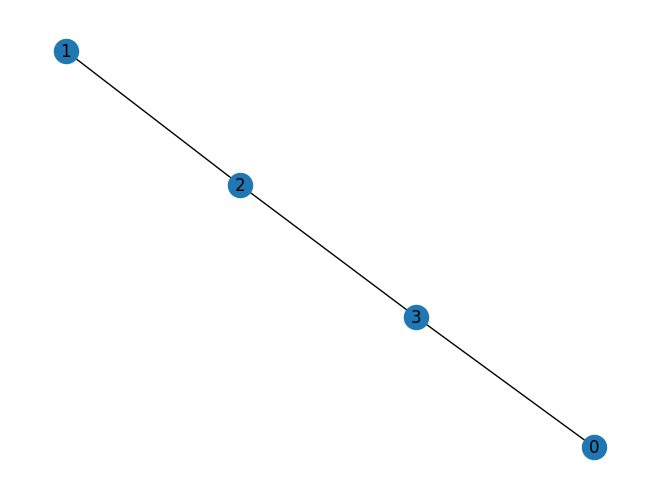

In [3]:

G = nx.erdos_renyi_graph(4, 2/(5-1))
nx.draw_kamada_kawai(G, with_labels=True)

### Universal interface
#### Cirq

In [4]:
p = 1
cirq_qaoa = CirqQAOAComposer(G, gamma=[.1]*p, beta=[.2]*p)
cirq_qaoa.ansatz_state()
cirq_qaoa.circuit

┌──┐           ┌──┐
0: ───H────@──────────────@─────X^0.4───────────────────────
           │              │
1: ───H────┼@─────────────┼@────X^0.4───────────────────────
           ││             ││
2: ───H────┼X────Z^0.2────┼X────@───────────────@───X^0.4───
           │              │     │               │
3: ───H────X─────Z^0.2────X─────X───────Z^0.2───X───X^0.4───
          └──┘           └──┘

#### Qiskit

In [5]:
from qtensor import QiskitQAOAComposer


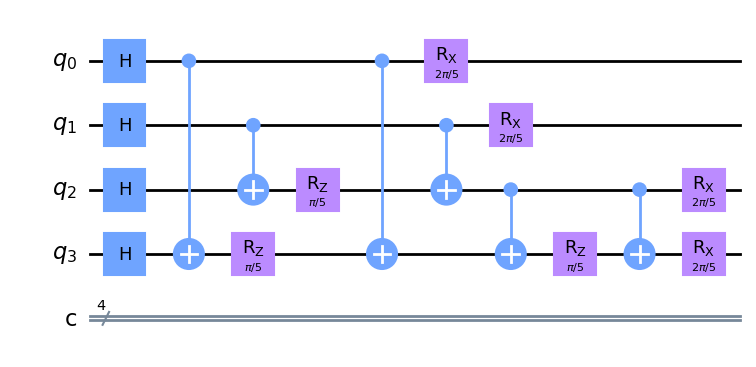

In [6]:
p = 1
qiskit_qaoa = QiskitQAOAComposer(G, gamma=[.1]*p, beta=[.2]*p)
qiskit_qaoa.ansatz_state()
qiskit_qaoa.circuit.draw('mpl')

## Simulate circuits
### Using qtree

In [7]:
from qtensor import QtreeSimulator

In [11]:
com = QtreeQAOAComposer(G, gamma=[.1]*p, beta=[.2]*p)
com.ansatz_state()
com.circuit
com.circuit[0].qubits

(0,)

In [13]:
sim = QtreeSimulator()
first_amp = sim.simulate(com.circuit)

first_amp

array([0.08550212+0.38739031j])

### Using Cirq

In [14]:
from qtensor import CirqSimulator

In [15]:
cirq_sim = CirqSimulator()
cirq_measure = cirq_sim.simulate(cirq_qaoa.circuit)

cirq_first_amp = cirq_measure.final_state_vector[0]
cirq_first_amp

(0.085502125+0.38739026j)

### Simulate multiple amplitudes

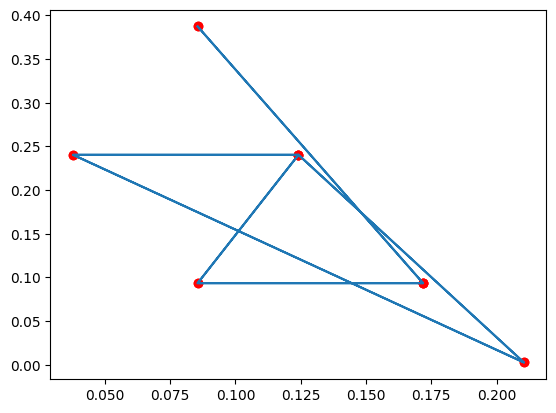

In [16]:
state = sim.simulate_batch(com.circuit, batch_vars=com.n_qubits)

# Plot real vs imaginary parts of Qtree vs Cirq simulator results
plt.plot(np.real(state), np.imag(state))
plt.scatter(*[f(cirq_measure.final_state_vector) for f in [np.real, np.imag]], c='red')

# Check for correctness
assert np.allclose(state, cirq_measure.final_state_vector)

## Use lightcone optimisaiton

Suppose we are interested in an expectation value of particular operator in a state $|\psi\rangle = \hat U | 0\rangle$. 
We can use the fact that in the expression
$$\langle \psi | \hat E | \psi \rangle = \langle 0 | \hat U^\dagger \hat E \hat U |0\rangle$$
a lot of operators from $\hat U$ cancel out.

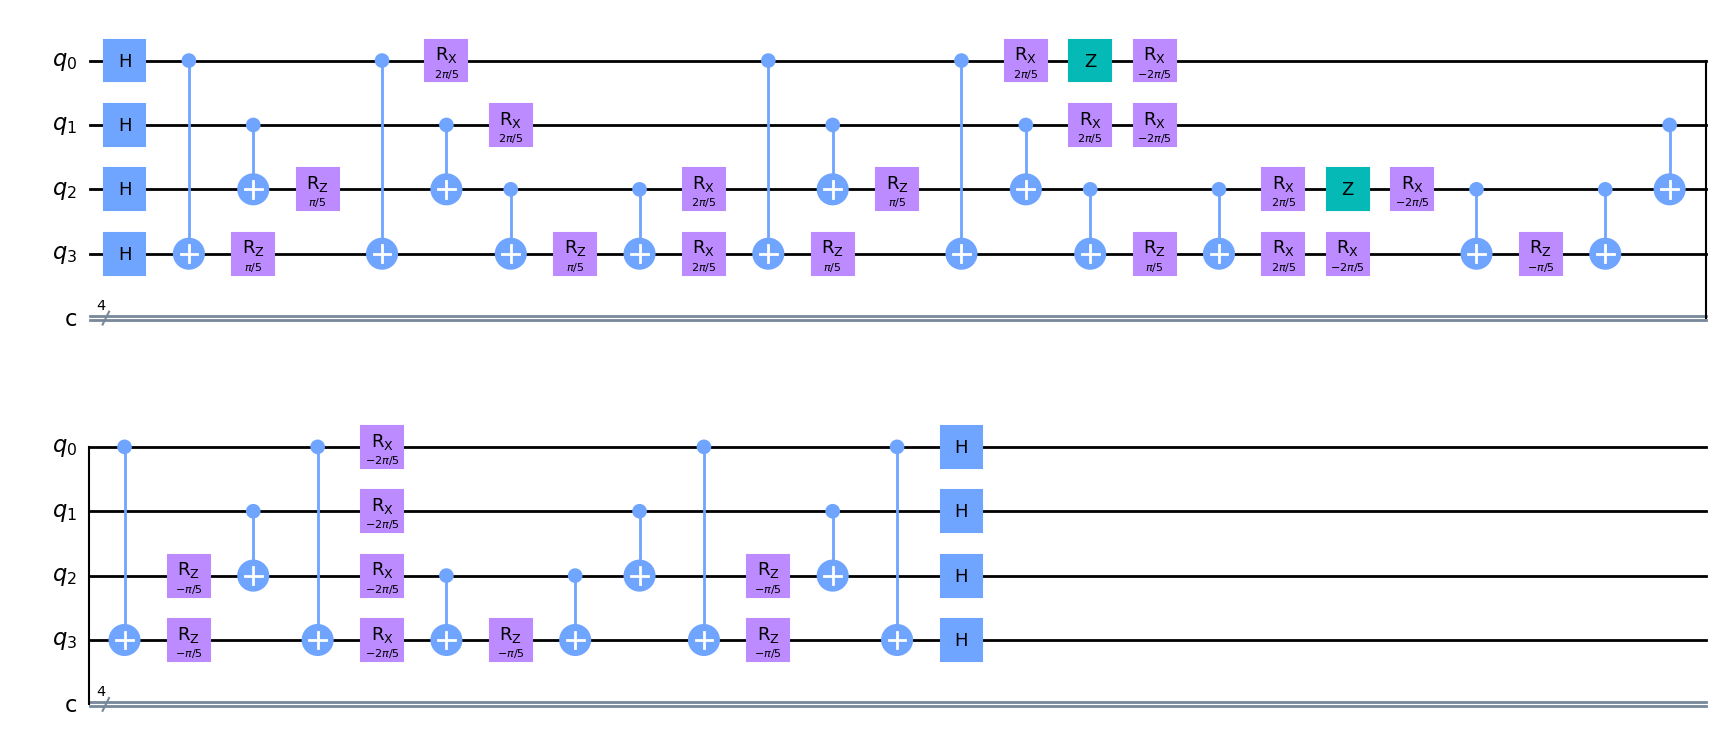

In [17]:
p = 2
qiskit_qaoa = QiskitQAOAComposer(G, gamma=[.1]*p, beta=[.2]*p)
qiskit_qaoa.energy_expectation_lightcone((0,2))
qiskit_qaoa.circuit.draw('mpl')

QTensor provides native support for canceling out the commuting operators

In [19]:
com = QtreeQAOAComposer(G, gamma=[.1]*p, beta=[.2]*p)
com.energy_expectation_lightcone(list(G.edges())[0])


In [20]:
from qtensor.QAOASimulator import QAOAQtreeSimulator
qaoa_sim = QAOAQtreeSimulator(QtreeQAOAComposer)

qaoa_sim.energy_expectation(G, gamma=[.1]*p, beta=[.2]*p)

Edge iteration:   0%|          | 0/3 [00:00<?, ?it/s]

array([1.52511548])

### Use qiskit circuit as input

In [21]:
from qtree.operators import from_qiskit_circuit

In [23]:
n, qc = from_qiskit_circuit(qiskit_qaoa.circuit)
all_gates = sum(qc, [])
sim.simulate(all_gates)

array([0.00386619-8.32667268e-17j])

## Optimization

In [19]:
from qtensor.optimisation.TensorNet import QtreeTensorNet
from qtensor.optimisation.Optimizer import TreeTrimSplitter, OrderingOptimizer

### Get line graph

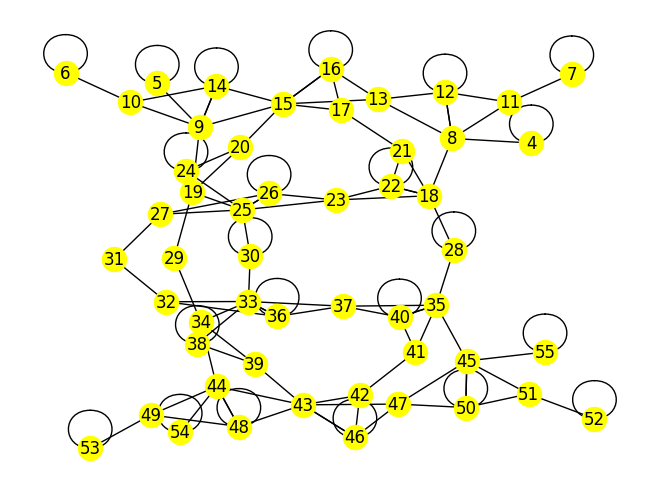

In [20]:
tn = QtreeTensorNet.from_qtree_gates(all_gates)
line_g = tn.get_line_graph()

nx.draw_kamada_kawai(line_g, with_labels=True, node_color='yellow')

### Find ordering

In [21]:
opt = OrderingOptimizer()
peo, tn = opt.optimize(tn)
print('Elimination order:', opt.peo)
opt.treewidth

Elimination order: [i_0, i_1, i_2, i_3, o_0, o_1, o_2, o_3, v_4, v_5, v_6, v_7, v_54, v_55, v_53, v_52, v_10, v_11, v_12, v_8, v_14, v_9, v_28, v_29, v_30, v_31, v_49, v_48, v_44, v_51, v_50, v_45, v_13, v_16, v_17, v_20, v_21, v_22, v_18, v_24, v_19, v_26, v_27, v_36, v_38, v_39, v_40, v_41, v_46, v_47, v_42, v_15, v_23, v_25, v_34, v_35, v_33, v_32, v_37, v_43]


4

In [22]:
opt = TreeTrimSplitter(tw_bias=26)
peo, slice_vars, tn = opt.optimize(tn)
opt.treewidth
print('Slice vars', slice_vars)

2023-06-28 17:39:33.445 | INFO     | qtensor.optimisation.Optimizer:_get_max_tw:104 - Memory available: 128523419648
2023-06-28 17:39:33.447 | INFO     | qtensor.optimisation.Optimizer:optimize:141 - Maximum treewidth: 6
2023-06-28 17:39:33.448 | INFO     | qtensor.optimisation.Optimizer:_split_graph:185 - Treewidth: 4
2023-06-28 17:39:33.449 | INFO     | qtensor.optimisation.Optimizer:_split_graph:186 - Target treewidth: 6


Slice vars []
